### Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

OBJECTIVE :
* melakukan analisis terhadap data booking penginapan
* melakukan permodelan machine learning untuk memprediksi customer cancel dan tidak
* membuat rekomendasi bisnis yang memiliki impact
besar bagi suatu perusahaan booking penginapan

### Load The Dataset

In [ ]:
# load the dataset
df = pd.read_csv('hotel_train.csv')

In [ ]:
# display the dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,...,314.0,NaN,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,...,1.0,NaN,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,...,12.0,NaN,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,...,NaN,200.0,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,...,16.0,NaN,0,Transient,57.92,0,1,Canceled,2017-08-24,5


In [ ]:
# dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

### About The Dataset <br>

hotel: Type of hotel (Categorical)

is_canceled: Whether the booking was canceled or not (Binary)

lead_time: Number of days between booking date and arrival date (Numeric)

arrival_date_year: The year of the arrival date (Numeric)

arrival_date_month: The month of the arrival date (Categorical)

arrival_date_week_number: The week number of the arrival date (Numeric)

arrival_date_day_of_month: The day of the month of the arrival date (Numeric)

stays_in_weekend_nights: Number of weekend nights stayed or booked to stay at the hotel (Numeric)

stays_in_week_nights: Number of week nights stayed or booked to stay at the hotel (Numeric)

adults, children, babies: Number of guests categorized by age groups

adults = Number of adults
children = Number of children
babies = Number infants

Booking Details:<br>
meal: Type(s) food option(s) included in booking package (Categorical)
country & market_segment & distribution_channel columns provide demographic and customer classification information. <br>
is_repeated_guest column specifies whether a guest is a repeated visitor or not. <br>
previous_cancellations column indicates how many previous bookings were canceled by a guest.<br>
previous_bookings_not_canceled shows how many previous bookings were not canceled by a guest.<br>

Accommodation Details:<br>
reserved_room_type column indicates which type room was originally reserved for each booking.<br>
assigned_room_type mentions which type room was finally assigned for each booking.<br>
booking_changes: Number of changes made to the booking before arrival.
deposit_type: Type of deposit made for the booking (Categorical).<br>
agent & company columns provide relevant information about the travel agency and/or company involved in making the reservation.<br>

Additional Information:<br>
days_in_waiting_list: Number of days the booking was on a waiting list before it was confirmed or canceled.<br>
customer_type provides information on types of customers (Categorical)<br>
adr: Average daily rate per room, calculated by dividing the sum of all lodging transactions by the total number of staying nights (Numeric)<br>

### Data Cleaning

In [ ]:
pd.DataFrame({'count': df.shape[0],
              'nulls': df.isnull().sum(),
              'nulls%': df.isnull().mean() * 100,
              'cardinality': df.nunique(),
              'duplicated' : df.duplicated().sum()
             })

,count,nulls,nulls%,cardinality,duplicated
hotel,83293,0,0.000000,64,0
is_canceled,83293,0,0.000000,2,0
lead_time,83293,0,0.000000,477,0
arrival_date_year,83293,0,0.000000,3,0
arrival_date_month,83293,0,0.000000,12,0
arrival_date_week_number,83293,0,0.000000,53,0
arrival_date_day_of_month,83293,0,0.000000,31,0
stays_in_weekend_nights,83293,0,0.000000,17,0
stays_in_week_nights,83293,0,0.000000,34,0
adults,83293,0,0.000000,14,0


There are 3 (0.003%) missing values in the children column, 346 (0.4%) in the country column, 11,404 (13%) in the agent column, and 78,559 (94%) in the company column. <br>

* drop the missing values in the children and the country column because they are below 5%
* drop the agent and company columns because they contain more than 5% missing values, and I assume these columns are not important and do not really affect the target.

In [ ]:
# drop missing values
df.dropna(subset=['children','country'], inplace=True)
df.drop(['agent', 'company'], axis=1, inplace=True)

NameError: name 'df' is not defined

In [ ]:
pd.DataFrame({'count': df.shape[0],
              'nulls': df.isnull().sum(),
              'nulls%': df.isnull().mean() * 100,
              'cardinality': df.nunique(),
              'duplicated' : df.duplicated().sum()
             })


,count,nulls,nulls%,cardinality,duplicated
hotel,82944,0,0.0,64,0
is_canceled,82944,0,0.0,2,0
lead_time,82944,0,0.0,477,0
arrival_date_year,82944,0,0.0,3,0
arrival_date_month,82944,0,0.0,12,0
arrival_date_week_number,82944,0,0.0,53,0
arrival_date_day_of_month,82944,0,0.0,31,0
stays_in_weekend_nights,82944,0,0.0,15,0
stays_in_week_nights,82944,0,0.0,32,0
adults,82944,0,0.0,14,0


In [ ]:
# check dataset summary after data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82944 entries, 0 to 83292
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           82944 non-null  object 
 1   is_canceled                     82944 non-null  int64  
 2   lead_time                       82944 non-null  int64  
 3   arrival_date_year               82944 non-null  int64  
 4   arrival_date_month              82944 non-null  object 
 5   arrival_date_week_number        82944 non-null  int64  
 6   arrival_date_day_of_month       82944 non-null  int64  
 7   stays_in_weekend_nights         82944 non-null  int64  
 8   stays_in_week_nights            82944 non-null  int64  
 9   adults                          82944 non-null  int64  
 10  children                        82944 non-null  float64
 11  babies                          82944 non-null  int64  
 12  meal                            82944

### Exploratory Data Analysis

Text(0, 0.5, 'Values')

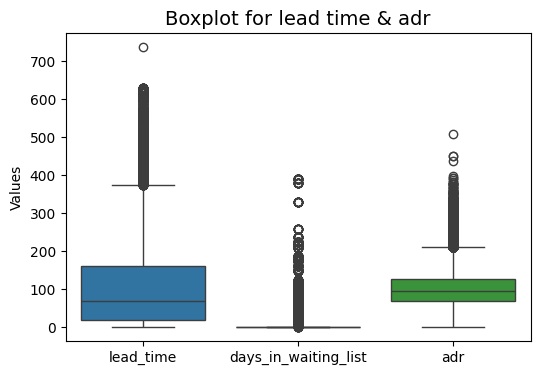

In [ ]:
# check outliers
plt.figure(figsize=(6,4 ))
sns.boxplot(data=df[['lead_time','days_in_waiting_list','adr']])

plt.title('Boxplot for lead time & adr', fontsize=14)
plt.ylabel('Values', fontsize=10)


Text(0, 0.5, 'Values')

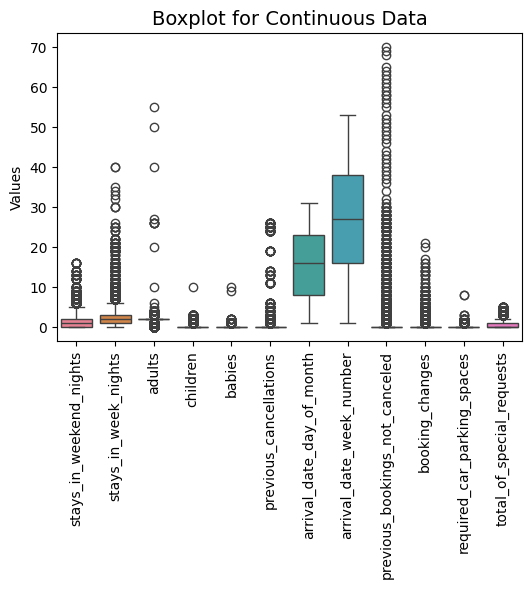

In [ ]:
# check outliers
plt.figure(figsize=(6, 4))
sns.boxplot(data=df[['stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','arrival_date_day_of_month','arrival_date_week_number',
                     'previous_bookings_not_canceled','booking_changes','stays_in_weekend_nights','required_car_parking_spaces','total_of_special_requests']])

plt.xticks(rotation=90)
plt.title('Boxplot for Continuous Data', fontsize=14)
plt.ylabel('Values', fontsize=10)

The outliers still make sense, so I didn't drop them.

In [ ]:
# statistical summary for numericals data
numericals = df.select_dtypes(include=['int64', 'float64']).columns
df[numericals].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,bookingID
count,82944.000000,82944.000000,82944.000000,82944.000000,82944.000000,82944.000000,82944.000000,82944.000000,82944.000000,82944.000000,82944.000000,82944.000000,82944.000000,82944.000000,82944.000000,82944.000000,82944.000000,82944.000000,82944.000000
mean,0.370443,104.214205,2018.157986,27.164557,15.787447,0.931604,2.505437,1.856337,0.103926,0.008042,0.030346,0.087047,0.136839,0.223151,2.362136,101.888512,0.061138,0.572085,41642.708056
std,0.482926,106.917129,0.706614,13.608945,8.775334,1.000723,1.913088,0.605626,0.399446,0.100733,0.171538,0.864606,1.543133,0.656692,17.857450,48.018623,0.243824,0.793444,24043.330863
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,20820.750000
50%,0.000000,69.000000,2018.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,41635.500000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,62465.250000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,10.000000,1.000000,26.000000,70.000000,21.000000,391.000000,508.000000,8.000000,5.000000,83293.000000


In [ ]:
# statistical summary for categoricals data
categoricals = df.select_dtypes(include=['object']).columns
df[categoricals].describe()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,82944,82944,82944,82944,82944,82944,82944,82944,82944,82944,82944,82944
unique,64,12,5,165,7,5,10,11,3,4,3,914
top,Renaissance New York Times Square Hotel New Yo...,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-10-21
freq,1369,9625,64111,33949,39383,68259,59791,51570,72640,62221,52218,1024


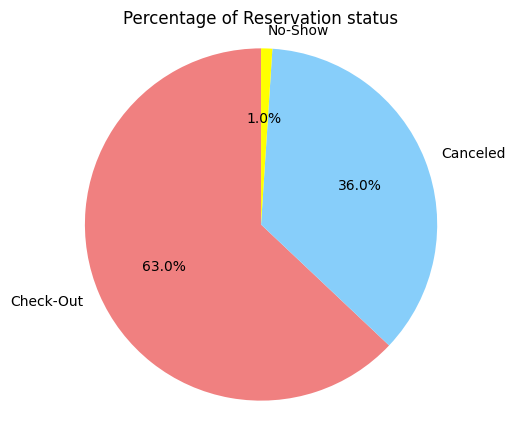

In [ ]:
# count the number of reservation status
reservation_counts = df['reservation_status'].value_counts()

# create reservation status pie plot
plt.figure(figsize=(5, 5))
plt.pie(reservation_counts, labels=reservation_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue','yellow'])
plt.title('Percentage of Reservation status')
plt.axis('equal')
plt.show()

In [ ]:
# check number of No-Show values
df.loc[df['reservation_status'] == 'No-Show']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
115,"The House, Barbados Barbados",1,0,2019,February,9,27,1,1,1,...,0,No Deposit,0,Transient,35.00,0,0,No-Show,2019-02-27,116
255,Spokane Downtown at the Convention Center Cour...,1,12,2018,January,3,15,2,2,2,...,2,No Deposit,0,Transient-Party,77.00,0,0,No-Show,2018-01-15,256
333,"Baltimore BWI Airport Courtyard Linthicum, MD",1,57,2018,May,21,18,0,2,3,...,0,No Deposit,0,Transient,111.60,0,0,No-Show,2018-05-18,334
344,"W London – Leicester Square London, United Kin...",1,352,2019,May,22,28,2,1,2,...,1,No Deposit,0,Transient,60.00,0,1,No-Show,2019-05-28,345
358,"Leipzig Marriott Hotel Leipzig, Germany",1,107,2017,August,33,9,2,4,2,...,0,No Deposit,0,Transient,63.75,0,1,No-Show,2017-08-09,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82916,"Waves, Barbados Barbados",1,0,2018,December,52,20,0,1,1,...,0,No Deposit,0,Transient,65.00,0,2,No-Show,2018-12-20,82917
83015,Fort Worth University Drive Courtyard Fort Wor...,1,0,2017,August,36,31,1,2,2,...,0,No Deposit,0,Transient,96.33,0,1,No-Show,2017-08-31,83016
83077,Courtyard by Marriott Aberdeen Airport Aberdee...,1,70,2019,February,9,26,2,5,2,...,0,No Deposit,0,Transient,108.07,0,3,No-Show,2019-02-26,83078
83178,"Mt. Laurel Courtyard Mt. Laurel, NJ",1,3,2019,February,5,2,0,1,1,...,0,No Deposit,0,Transient,98.00,0,1,No-Show,2019-02-02,83179


there are 851 rows with No-Show values <br>
No-Show == 1 (canceled)

### Deep Dive Analysis

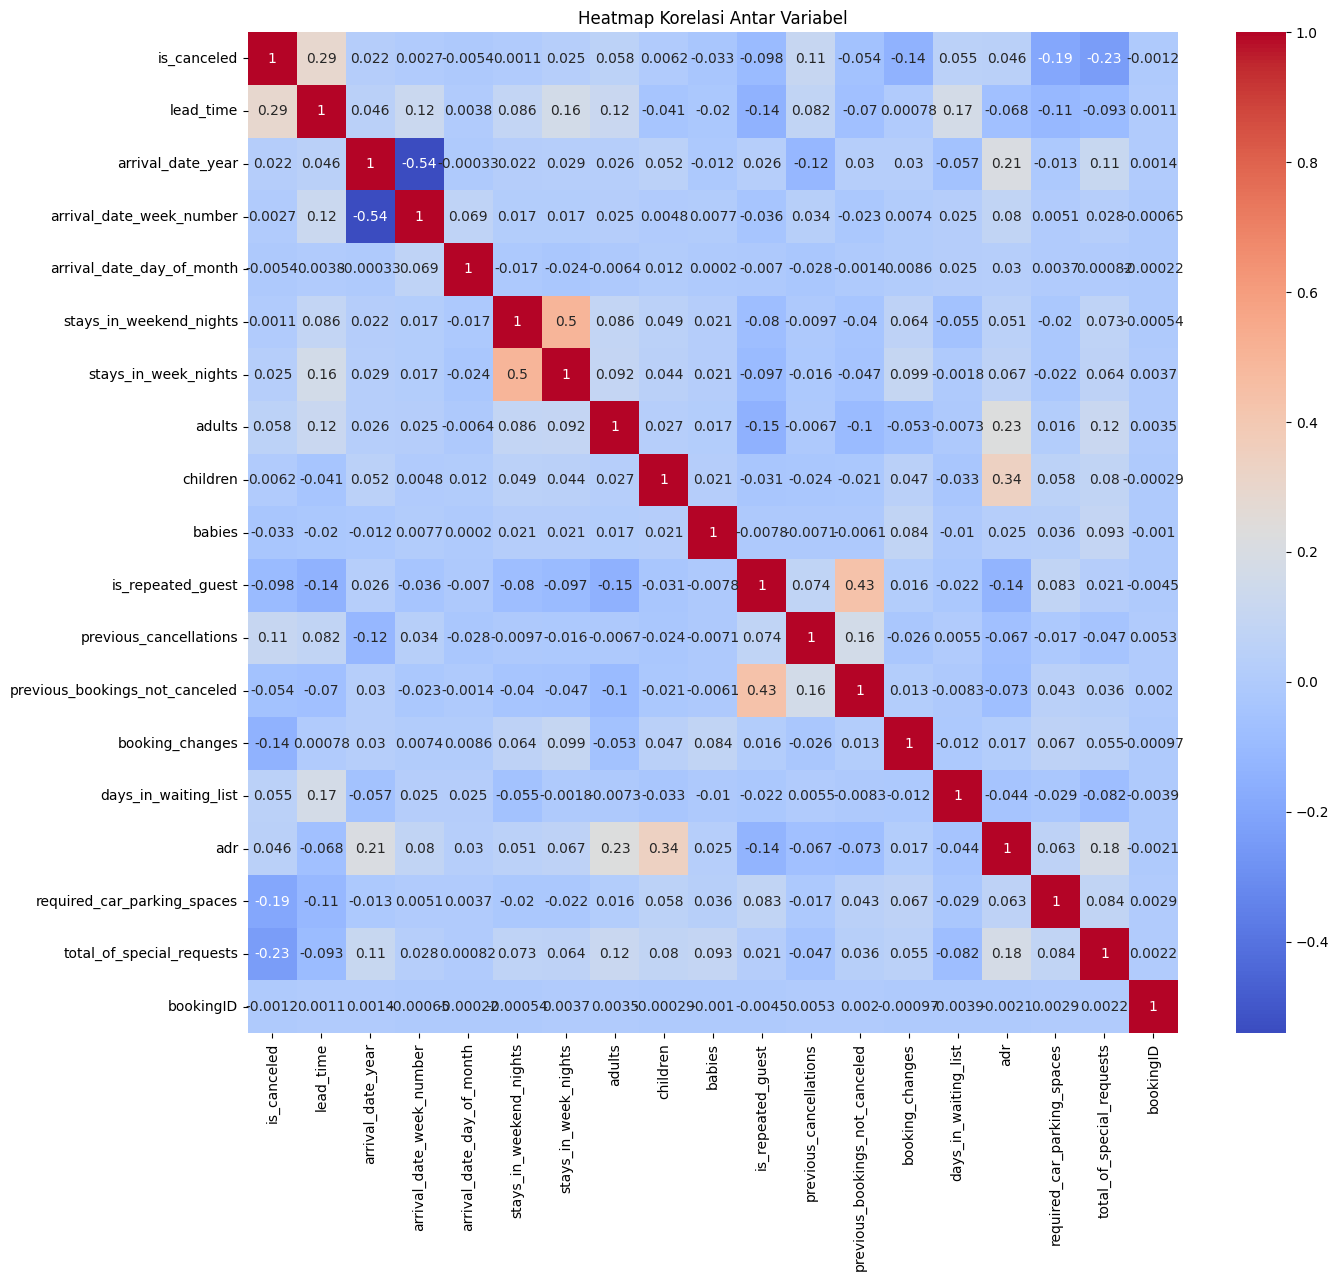

In [ ]:
# create correlation heatmap of numericals data
nums = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 13))
corr_matrix = df[nums].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

tidak ada data yang berkorelasi tinggi >0.75

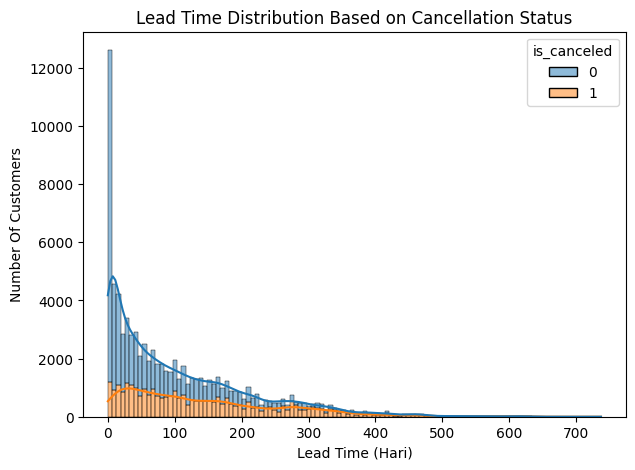

In [ ]:
# create histogram lead time distribution based on cancellation status
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='lead_time', hue='is_canceled', multiple='stack', kde=True)
plt.title('Lead Time Distribution Based on Cancellation Status')
plt.xlabel('Lead Time (Hari)')
plt.ylabel('Number Of Customers')
plt.show()


Insight : sebagian besar pesanan yang tidak dibatalkan memiliki waktu tunggu yang lebih pendek, sedangkan pesanan yang dibatalkan lebih sedikit dan tersebar di berbagai waktu tunggu.

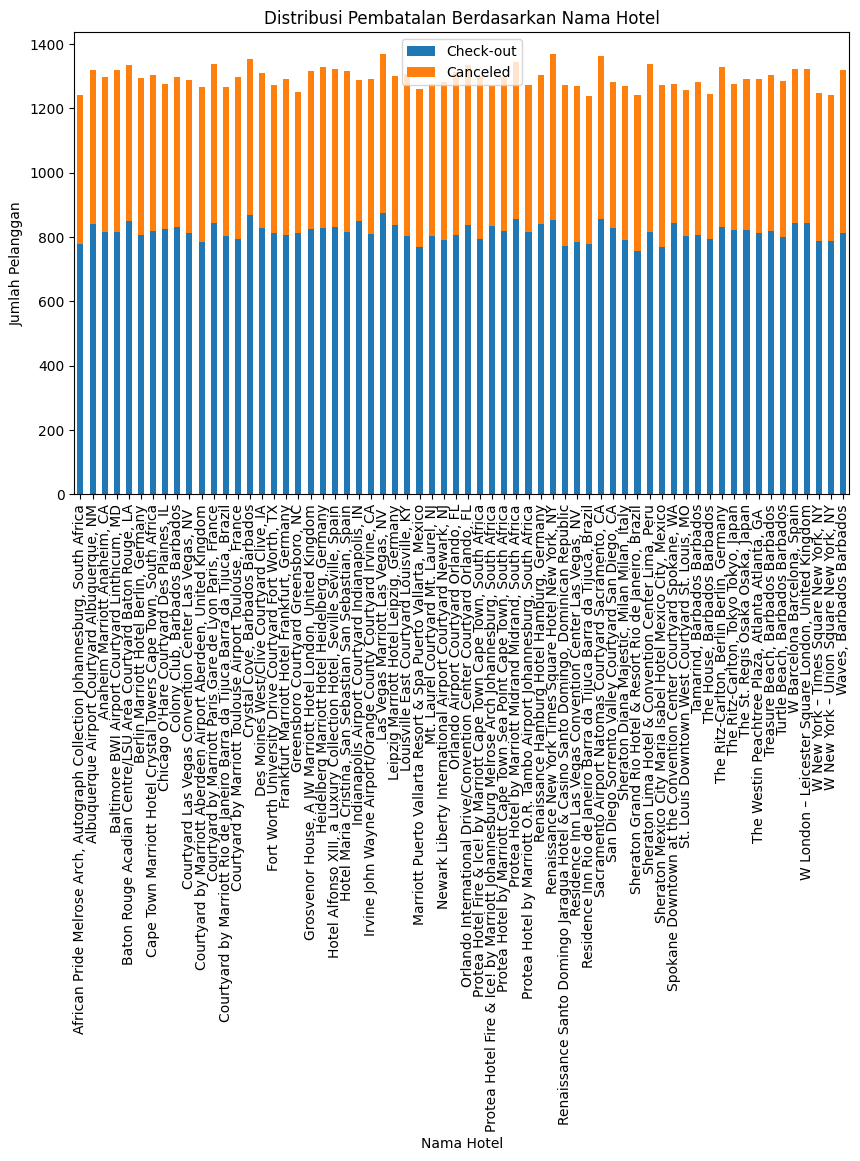

In [ ]:
# melihat distribusi customer yang cancel dan tidak berdasarkan nama hotel
grouped_data = df.groupby(['hotel', 'is_canceled']).size().unstack(fill_value=0)

# Membuat bar plot
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribusi Pembatalan Berdasarkan Nama Hotel')
plt.xlabel('Nama Hotel')
plt.ylabel('Jumlah Pelanggan')
plt.legend(['Check-out', 'Canceled'])
plt.show()


Insight : customer yang cancel lebih sedikit dari yang check-out, dan persebarannya beragam pada tiap hotel

In [ ]:
# dataset summary to check string value
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82944 entries, 0 to 83292
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           82944 non-null  object 
 1   is_canceled                     82944 non-null  int64  
 2   lead_time                       82944 non-null  int64  
 3   arrival_date_year               82944 non-null  int64  
 4   arrival_date_month              82944 non-null  object 
 5   arrival_date_week_number        82944 non-null  int64  
 6   arrival_date_day_of_month       82944 non-null  int64  
 7   stays_in_weekend_nights         82944 non-null  int64  
 8   stays_in_week_nights            82944 non-null  int64  
 9   adults                          82944 non-null  int64  
 10  children                        82944 non-null  float64
 11  babies                          82944 non-null  int64  
 12  meal                            82944

### check unique values in categorical data

In [ ]:
df[['hotel']].value_counts()

,count
hotel,
"Renaissance New York Times Square Hotel New York, NY",1369
"Las Vegas Marriott Las Vegas, NV",1368
"Sacramento Airport Natomas Courtyard Sacramento, CA",1363
"Crystal Cove, Barbados Barbados",1355
"Protea Hotel by Marriott Midrand Midrand, South Africa",1345
...,...
"The House, Barbados Barbados",1245
"Sheraton Grand Rio Hotel & Resort Rio de Janeiro, Brazil",1243
"African Pride Melrose Arch, Autograph Collection Johannesburg, South Africa",1243


In [ ]:
df[['arrival_date_month']].value_counts()

,count
arrival_date_month,
August,9625
July,8706
May,8214
April,7756
October,7689
June,7657
September,7369
March,6771
February,5524


In [ ]:
df[['meal']].value_counts()

,count
meal,
BB,64111
HB,10074
SC,7392
Undefined,825
FB,542


In [ ]:
df[['country']].value_counts()

,count
country,
PRT,33949
GBR,8381
FRA,7243
ESP,5897
DEU,5107
...,...
MYT,1
SDN,1
NAM,1


In [ ]:
df[['market_segment']].value_counts()

,count
market_segment,
Online TA,39383
Offline TA/TO,16880
Groups,13787
Direct,8627
Corporate,3588
Complementary,517
Aviation,162


In [ ]:
df[['distribution_channel']].value_counts()

,count
distribution_channel,
TA/TO,68259
Direct,10037
Corporate,4514
GDS,133
Undefined,1


In [ ]:
df[['reserved_room_type']].value_counts()

,count
reserved_room_type,
A,59791
D,13300
E,4536
F,2041
G,1432
B,774
C,657
H,408
L,3


In [ ]:
df[['assigned_room_type']].value_counts()

,count
assigned_room_type,
A,51570
D,17480
E,5368
F,2627
G,1763
C,1664
B,1527
H,479
I,257


In [ ]:
df[['deposit_type']].value_counts()

,count
deposit_type,
No Deposit,72640
Non Refund,10194
Refundable,110


In [ ]:
df[['customer_type']].value_counts()

,count
customer_type,
Transient,62221
Transient-Party,17524
Contract,2793
Group,406


In [ ]:
df[['reservation_status']].value_counts()

,count
reservation_status,
Check-Out,52218
Canceled,29875
No-Show,851


In [ ]:
df[['reservation_status_date']].value_counts()

,count
reservation_status_date,
2017-10-21,1024
2018-11-25,560
2017-07-06,558
2017-01-01,535
2018-01-18,437
...,...
2017-02-25,1
2017-02-26,1
2017-03-10,1


Kesimpulan:
* saya tidak menggunakan kolom hotel & country karena fiturnya terlalu banyak, saya ingin mengelompokkan nama negara menjadi benua tetapi karena keterbatasan pengetahuan saya jadi saya memutuskan tidak menggunakannya pada permodelan.
* kolom-kolom yang mengandung tanggal/datetime saya tidak gunakan karena sudah diwakili oleh kolom lead time
* saya tidak menggunakan kolom market segment karea sudah diwakili oleh kolom distribution channel
* saya tidak menggunakan kolom reservation status karena sudah diwakili oleh kolom is canceled

### Feature Engineering

In [ ]:
# one hot encoding categoricals column

cats = ['meal','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type']
df_encoded = pd.get_dummies(df, columns=cats, dtype = int, drop_first=True)

In [ ]:
df_encoded.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,...,0,0,0,0,0,0,0,0,1,0
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,...,0,0,0,0,0,1,0,0,1,0
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,...,0,0,0,0,0,1,0,0,1,0
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,...,0,0,0,0,0,0,0,0,1,0
5,"Hotel Maria Cristina, San Sebastian San Sebast...",1,395,2018,March,13,21,1,2,2,...,0,0,0,0,0,1,0,0,1,0


### Feature Selection


In [ ]:
# drop kolom yang tidak dibutuhkan
df_new = df_encoded.select_dtypes(exclude=['object'])
df_new = df_new.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','bookingID'], axis=1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82944 entries, 0 to 83292
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     82944 non-null  int64  
 1   lead_time                       82944 non-null  int64  
 2   stays_in_weekend_nights         82944 non-null  int64  
 3   stays_in_week_nights            82944 non-null  int64  
 4   adults                          82944 non-null  int64  
 5   children                        82944 non-null  float64
 6   babies                          82944 non-null  int64  
 7   is_repeated_guest               82944 non-null  int64  
 8   previous_cancellations          82944 non-null  int64  
 9   previous_bookings_not_canceled  82944 non-null  int64  
 10  booking_changes                 82944 non-null  int64  
 11  days_in_waiting_list            82944 non-null  int64  
 12  adr                             82944

### Multicollinearity Handling

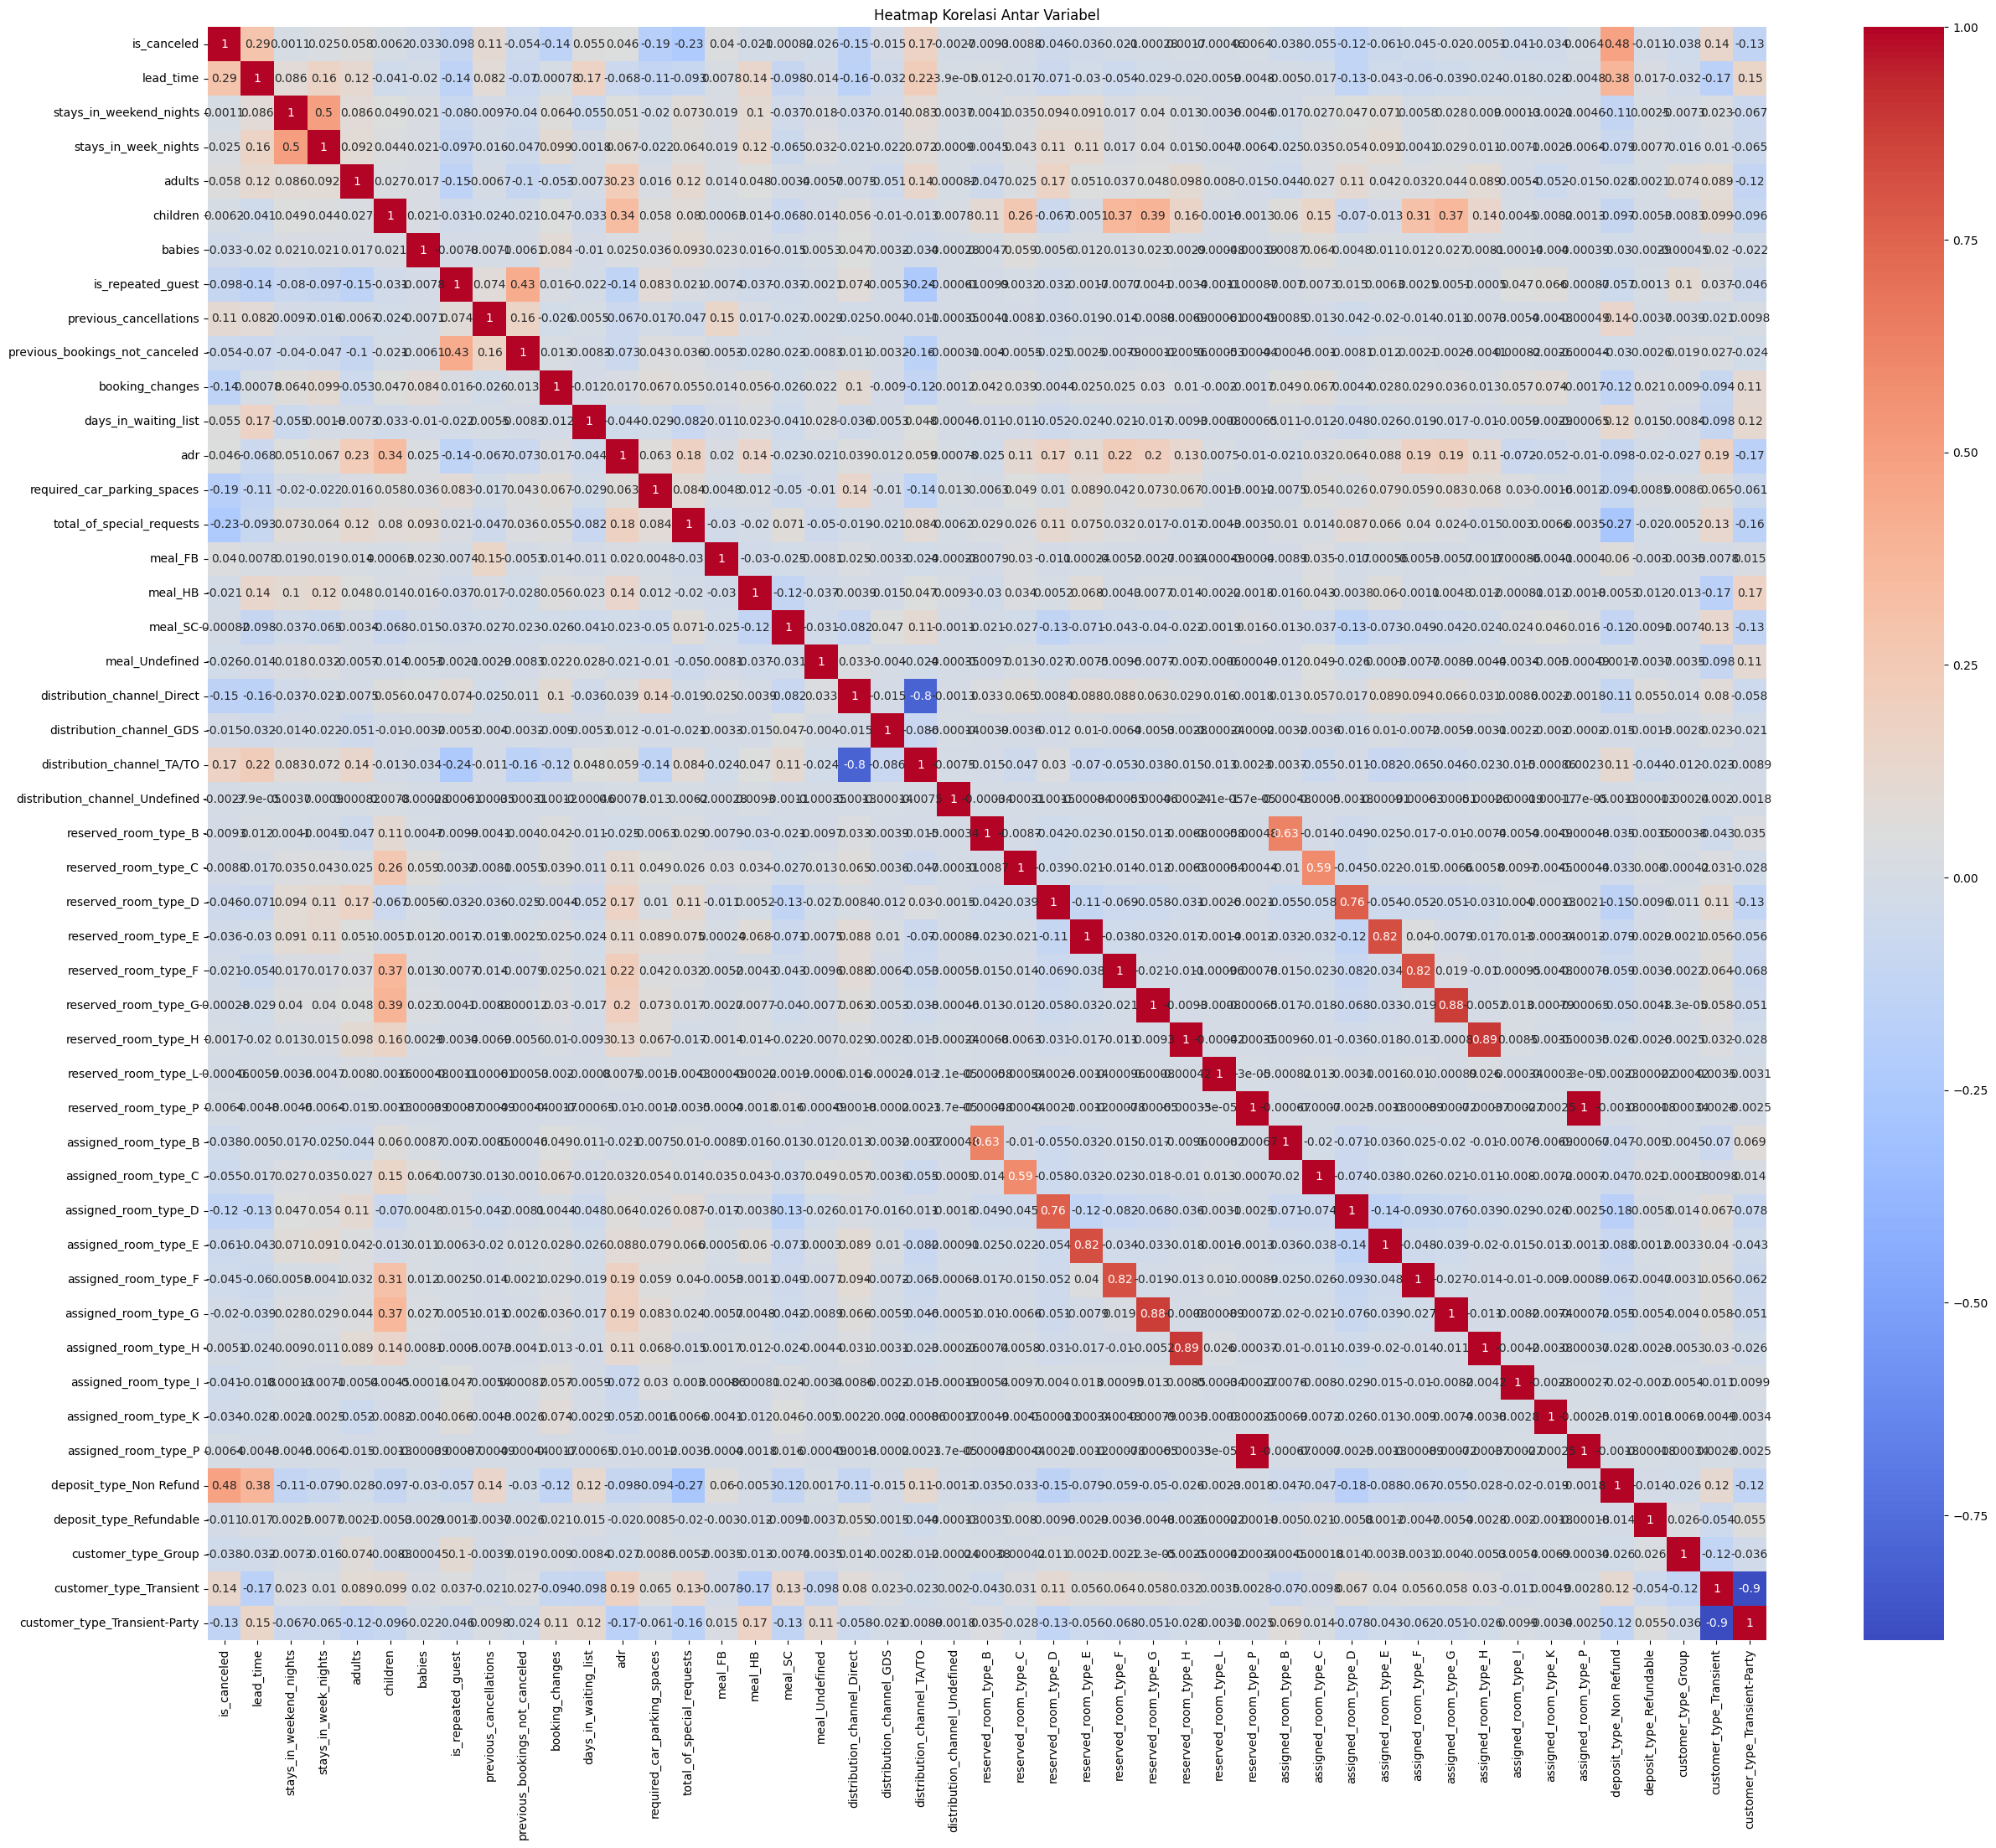

In [ ]:
# create correlation heatmap of numericals data

plt.figure(figsize=(30, 25))
corr_matrix = df_new.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

Interpretasi <br>
terdapat banyak kolom yang saling berkorelasi tinggi > 0.75 :
* customer type transient & customer type transient party -0.9
* assigned room type D & reserved room type D 0.76
* assigned room type E & reserved room type E 0.82
* assigned room type F & reserved room type F 0.82
* assigned room type G & reserved room type G 0.88
* assigned room type H & reserved room type H 0.89
* assigned room type P & reserved room type P 1

saya memilih mendrop kolom customer type transient party karena nilai korelasinya terhadap variabel target lebih rendah, <br>
reserved room type D, E, F, G, H, P karena saya mempertahankan kolom pilihan room type terakhir customer.



In [ ]:
# drop kolom dengan korelasi tinggi
df_new = df_new.drop(['customer_type_Transient-Party','reserved_room_type_D','reserved_room_type_E',
                      'reserved_room_type_F','reserved_room_type_G','reserved_room_type_H','reserved_room_type_P'], axis=1)

In [ ]:
# dataset summary yang siap digunakan untuk permodelan
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82944 entries, 0 to 83292
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     82944 non-null  int64  
 1   lead_time                       82944 non-null  int64  
 2   stays_in_weekend_nights         82944 non-null  int64  
 3   stays_in_week_nights            82944 non-null  int64  
 4   adults                          82944 non-null  int64  
 5   children                        82944 non-null  float64
 6   babies                          82944 non-null  int64  
 7   is_repeated_guest               82944 non-null  int64  
 8   previous_cancellations          82944 non-null  int64  
 9   previous_bookings_not_canceled  82944 non-null  int64  
 10  booking_changes                 82944 non-null  int64  
 11  days_in_waiting_list            82944 non-null  int64  
 12  adr                             82944

### Train Test Split

In [ ]:
# Train test split before scalling

feature = df_new.drop('is_canceled', axis=1)
target = df_new['is_canceled']

ftr_train, ftr_test, tg_train,tg_test = train_test_split(feature,target,
                                                test_size = 0.20,
                                                random_state = 42)

### Standarization (Feature Scalling)

In [ ]:
# standard scalling

scaler = StandardScaler()
scaler.fit(ftr_train)
X_std = scaler.transform(feature)
df_std = pd.DataFrame(data = X_std, columns = feature.columns)
df_std.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient
0,-0.899715,-0.931456,0.782586,0.234782,-0.260647,-0.082491,-0.177873,-0.099489,-0.088757,-0.335877,...,-0.18096,-0.146543,-0.077287,-0.054568,-0.051127,-0.00549,-0.374274,-0.036441,-0.070374,0.575825
1,3.920267,-0.931456,-0.263537,0.234782,-0.260647,-0.082491,-0.177873,-0.099489,-0.088757,-0.335877,...,-0.18096,-0.146543,-0.077287,-0.054568,-0.051127,-0.00549,2.671839,-0.036441,-0.070374,0.575825
2,0.660241,0.067473,-0.263537,0.234782,-0.260647,-0.082491,-0.177873,-0.099489,-0.088757,-0.335877,...,-0.18096,-0.146543,-0.077287,-0.054568,-0.051127,-0.00549,2.671839,-0.036441,-0.070374,0.575825
3,-0.666188,1.066403,0.259524,0.234782,-0.260647,-0.082491,-0.177873,-0.099489,-0.088757,-0.335877,...,-0.18096,-0.146543,-0.077287,-0.054568,-0.051127,-0.00549,-0.374274,-0.036441,-0.070374,0.575825
4,2.715272,0.067473,-0.263537,0.234782,-0.260647,-0.082491,-0.177873,1.013577,-0.088757,-0.335877,...,-0.18096,-0.146543,-0.077287,-0.054568,-0.051127,-0.00549,2.671839,-0.036441,-0.070374,0.575825


In [ ]:
# Train test split after scalling

feature2 = df_std
target2 = df_new['is_canceled']

ftr2_train, ftr2_test, tg2_train,tg2_test = train_test_split(feature2,target2,
                                                test_size = 0.20,
                                                random_state = 42)

### Model Training

In [ ]:
# define & training logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(ftr2_train, tg2_train)

LogisticRegression(random_state=42)

In [ ]:
# define & training decision tree classifier model
decision_tree_clf = DecisionTreeClassifier(random_state=42)
decision_tree_clf.fit(ftr2_train, tg2_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# define & training random forest model
random_forest_clf = RandomForestClassifier(random_state=42)
random_forest_clf.fit(ftr2_train, tg2_train)

RandomForestClassifier(random_state=42)

In [ ]:
# define & XGBoost classifier model
xgb_clf = XGBClassifier(random_state = 42)
xgb_clf.fit(ftr2_train, tg2_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Model Evaluation

Logistic Regression

In [ ]:
# evaluasi model logistic regression pada data train
logreg_pred_train = logreg.predict(ftr2_train)
print(classification_report(tg2_train, logreg_pred_train))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     41840
           1       0.85      0.54      0.66     24515

    accuracy                           0.80     66355
   macro avg       0.81      0.74      0.76     66355
weighted avg       0.81      0.80      0.78     66355



In [ ]:
# evaluasi model logistic regression pada data test
logreg_pred_test = logreg.predict(ftr2_test)
print(classification_report(tg2_test, logreg_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     10378
           1       0.85      0.54      0.67      6211

    accuracy                           0.79     16589
   macro avg       0.82      0.74      0.76     16589
weighted avg       0.81      0.79      0.78     16589



Kesimpulan : Model logistic regression mengalami underfitting karena hasil F1 score masih rendah

Decision Tree

In [ ]:
# evaluasi model decision tree pada data train
dt_pred_train = decision_tree_clf.predict(ftr2_train)
print(classification_report(tg2_train, dt_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     41840
           1       0.99      0.98      0.99     24515

    accuracy                           0.99     66355
   macro avg       0.99      0.99      0.99     66355
weighted avg       0.99      0.99      0.99     66355



In [ ]:
# evaluasi model decision tree pada data test
dt_pred_test = decision_tree_clf.predict(ftr2_test)
print(classification_report(tg2_test, dt_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84     10378
           1       0.73      0.75      0.74      6211

    accuracy                           0.80     16589
   macro avg       0.79      0.79      0.79     16589
weighted avg       0.80      0.80      0.80     16589



Kesimpulan : model decision tree mengalami overfitting karena nilai F1 score pada data train bagus dan pada data test jauh lebih rendah

Random Forest

In [ ]:
# evaluasi model random forest pada data train
rf_pred_train = random_forest_clf.predict(ftr2_train)
print(classification_report(tg2_train, rf_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     41840
           1       0.99      0.98      0.99     24515

    accuracy                           0.99     66355
   macro avg       0.99      0.99      0.99     66355
weighted avg       0.99      0.99      0.99     66355



In [ ]:
# evaluasi model random forest pada data test
rf_pred_test = random_forest_clf.predict(ftr2_test)
print(classification_report(tg2_test, rf_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     10378
           1       0.85      0.73      0.78      6211

    accuracy                           0.85     16589
   macro avg       0.85      0.82      0.83     16589
weighted avg       0.85      0.85      0.85     16589



Kesimpulan : model random forest mengalami overfitting karena nilai F1 score pada data train bagus dan pada data test jauh lebih rendah

XGBoost Classifier

In [ ]:
# evaluasi model XGBoost Classifier pada data train
xgb_pred_train = xgb_clf.predict(ftr2_train)
print(classification_report(tg2_train, xgb_pred_train))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     41840
           1       0.87      0.67      0.76     24515

    accuracy                           0.84     66355
   macro avg       0.85      0.81      0.82     66355
weighted avg       0.84      0.84      0.84     66355



In [ ]:
# evaluasi model XGBoost Classifier pada data test
xgb_pred_test = xgb_clf.predict(ftr2_test)
print(classification_report(tg2_test, xgb_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87     10378
           1       0.85      0.65      0.74      6211

    accuracy                           0.83     16589
   macro avg       0.83      0.79      0.80     16589
weighted avg       0.83      0.83      0.82     16589



Kesimpulan : <br>
Model XGBoost Classifier dipilih sebagai model terbaik karena tidak underfitting ataupun overfitting, yaitu memiliki hasil evaluasi f1 score pada data train dan data test yang hampir sama.

### Hyperparameter Tuning

In [ ]:
# hyperparameter tuning menggunakan model terbaik yaitu XGBoost Classifier

parameters = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': [1, 2, 3, 4, 5]
}

# using GridSearchCV with f1 as scoring metric
xgb_clf_gridcv = GridSearchCV(xgb_clf, parameters, cv=5, scoring='f1')

# fitting the model
xgb_clf_gridcv.fit(ftr2_train, tg2_train)

# print best parameters
print("Best parameters found: ", xgb_clf_gridcv.best_params_)

Best parameters found:  {'max_depth': 5, 'n_estimators': 50}


In [ ]:
# menampilkan result best parameter berdasarkan rank
cv_result = pd.DataFrame(xgb_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
24,"{'max_depth': 5, 'n_estimators': 50}",0.706793,1
23,"{'max_depth': 5, 'n_estimators': 40}",0.700402,2
19,"{'max_depth': 4, 'n_estimators': 50}",0.700361,3
18,"{'max_depth': 4, 'n_estimators': 40}",0.695579,4
22,"{'max_depth': 5, 'n_estimators': 30}",0.694590,5
14,"{'max_depth': 3, 'n_estimators': 50}",0.689972,6
17,"{'max_depth': 4, 'n_estimators': 30}",0.689404,7
21,"{'max_depth': 5, 'n_estimators': 20}",0.685971,8
13,"{'max_depth': 3, 'n_estimators': 40}",0.684996,9
16,"{'max_depth': 4, 'n_estimators': 20}",0.680159,10


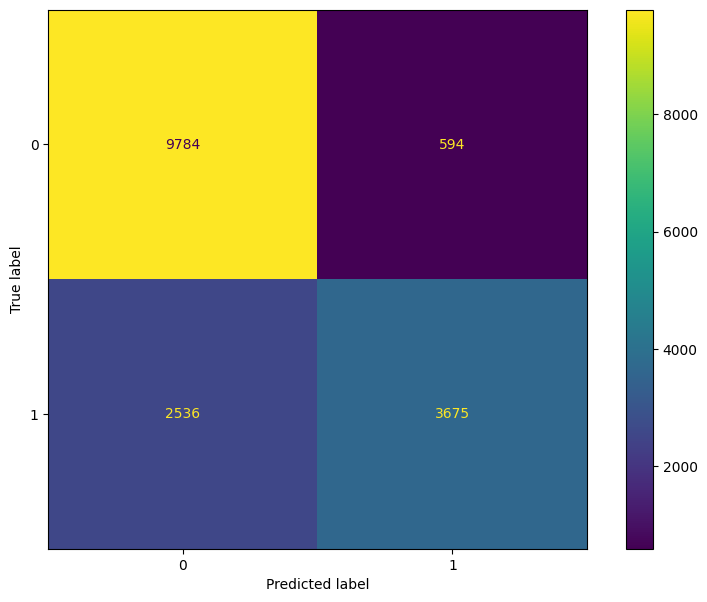

In [ ]:
# menampilkan confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
xgb_pred = xgb_clf_gridcv.best_estimator_.predict(ftr2_test)

cm = confusion_matrix(tg2_test, xgb_pred, labels=xgb_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Kesimpulan : <br>
Model XGBoost dengan best parameter memprediksi 2536 customer check-out padahal sebenarnya cancel (False Negatif)<br>

Model XGBoost tanpa hyperparameter tuning masih lebih baik hasil prediksinya yaitu 76% sedangkan model XGBoost dengan hyperparameter tuning 70%

REKOMENDASI BISNIS :
* berikan diskon atau layanan tambahan untuk customer yang diprediksi akan cancel
* tawarkan kemudahan rebooking tanpa penalti untuk customer yang diprediksi akan cancel
* hotel bisa mengelola ketersediaan kamar dengan lebih baik menggunakan model yang memprediksi customer yang akan membatalkan pesanan.
